In [1]:
from world import World 
import matplotlib.pyplot as plt
import numpy as np

## Basic Bots
The first iteration of agents are simple in that they lack an internal model or any real learning. Instead they have behavioral priors that are sampled from to generate a behavior state and prediction posterior values that seek to estimate the priors of other agents. 

If we run the the most basic simulation, two "agents of chaos" shoot behaviors at each other and randomly adjust their behavior priors and predictions of the other based on the magnitude of their prediction error, if that error is sufficiently high. As you can see, the error does not decrease reliably over time.

In [2]:
world = World(agent=["chaos","chaos"], seed=7)
world.create_agents()
world.run()
agents = world.get_agents()
costs = world.get_costs()
preds = world.get_pred()
priors = world.get_behav_priors()
time = [t for t in range(len(costs[0]))]
#world.print_results()

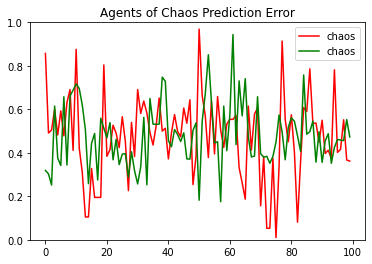

In [3]:
plt.plot(time, costs[0], 'r',label=agents[0])
plt.plot(time, costs[1], 'g', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Agents of Chaos Prediction Error")
plt.show()

## With a Dummy

A dummy agent will keep a constant behavior. The chaotic agent will readjust its prediction as long as it is wrong, but not necessarily in the right direction. Sometimes the chaotic agent will reach the threshold and not adjust, but it is not guaranteed given the short time frame. 

In [4]:
d_c_world = World(state_size=20, time=100, agent=["chaos","dummy"], seed=3)
d_c_world.create_agents()
d_c_world.run()
agents = d_c_world.get_agents()
errors = d_c_world.get_costs()
preds = d_c_world.get_pred()
priors = d_c_world.get_behav_priors()
time = [t for t in range(len(errors[0]))]

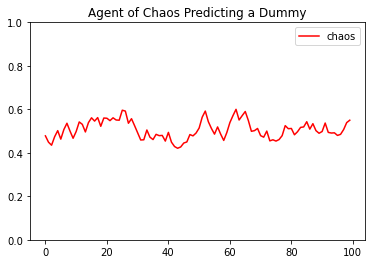

In [5]:
plt.plot(time, errors[0], 'r', label=agents[0])
plt.ylim([0, 1])
plt.legend()
plt.title("Agent of Chaos Predicting a Dummy")
plt.show()

## Averaging Agents
Averaging agents remember either previous predictions or previous observed behaviors, and use this information to adjust their next prediction and behavioral priors.

In [128]:
d_a_world = World(state_size=20, time=100, agent=["prediction","dummy"], memory=[2,2], model_var=[0,0])
d_a_world.create_agents()
d_a_world.run()
agents = d_a_world.get_agents()
errors = d_a_world.get_costs()
preds = d_a_world.get_pred()
priors = d_a_world.get_behav_priors()
time = [t for t in range(len(errors[0]))]

1
[0.907, 0.279, 1.091, 0.177, 0.395, 1.833, 0.023, 1.408, 1.297, 0.162, 1.858, 0.714, 0.033, 0.985, 1.7570000000000001, 0.904, 0.832, 0.031, 1.151, 0.317]
[0.4535, 0.1395, 0.5455, 0.0885, 0.1975, 0.9165, 0.0115, 0.704, 0.6485, 0.081, 0.929, 0.357, 0.0165, 0.4925, 0.8785000000000001, 0.452, 0.416, 0.0155, 0.5755, 0.1585]
[0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0]
2
[0.907, 0.279, 2.091, 0.177, 0.395, 2.833, 0.023, 2.408, 2.2969999999999997, 0.162, 2.858, 0.714, 0.033, 0.985, 2.757, 0.904, 0.832, 0.031, 2.151, 0.317]
[0.30233333333333334, 0.09300000000000001, 0.6970000000000001, 0.059, 0.13166666666666668, 0.9443333333333334, 0.007666666666666666, 0.8026666666666666, 0.7656666666666666, 0.054, 0.9526666666666667, 0.238, 0.011000000000000001, 0.3283333333333333, 0.919, 0.30133333333333334, 0.2773333333333333, 0.010333333333333333, 0.717, 0.10566666666666667]
[0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
2
[0.7558333333333334, 0.23250000000000004, 2.2425, 0.1475, 0.32916666

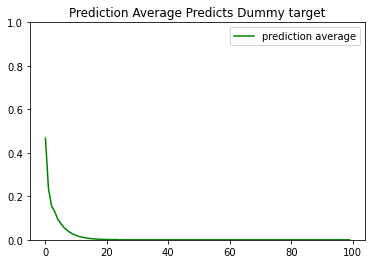

In [129]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.ylim([0, 1])
plt.legend()
plt.title("Prediction Average Predicts Dummy target")
plt.show()

In [208]:
d_p_world = World(state_size=20, time=100, agent=["prediction","prediction"], memory=[2,2], model_var=[.1,.1])
d_p_world.create_agents()
d_p_world.run()
agents = d_p_world.get_agents()
errors = d_p_world.get_costs()
preds = d_p_world.get_pred()
priors = d_p_world.get_behav_priors()
time = [t for t in range(len(errors[0]))]

1
[1.395, 1.287, 1.6139999999999999, 0.233, 1.862, 1.79, 1.06, 0.332, 1.609, 1.155, 1.05, 0.164, 0.341, 1.631, 0.506, 0.622, 0.648, 0.789, 1.47, 0.818]
[0.6975, 0.6435, 0.8069999999999999, 0.1165, 0.931, 0.895, 0.53, 0.166, 0.8045, 0.5775, 0.525, 0.082, 0.1705, 0.8155, 0.253, 0.311, 0.324, 0.3945, 0.735, 0.409]
[1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0]
1
[1.504, 1.05, 0.599, 1.339, 0.447, 1.316, 1.207, 1.933, 0.939, 1.335, 0.652, 0.024, 0.514, 0.722, 1.6280000000000001, 1.354, 0.548, 1.463, 1.4729999999999999, 1.052]
[0.752, 0.525, 0.2995, 0.6695, 0.2235, 0.658, 0.6035, 0.9665, 0.4695, 0.6675, 0.326, 0.012, 0.257, 0.361, 0.8140000000000001, 0.677, 0.274, 0.7315, 0.7364999999999999, 0.526]
[1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1]
2
[2.395, 2.287, 2.614, 0.233, 1.862, 2.79, 2.06, 1.332, 2.609, 2.1550000000000002, 1.05, 1.164, 1.341, 2.6310000000000002, 0.506, 1.6219999999999999, 0.648, 0.789, 1.47, 0.818]
[0.7983333333333333, 0.7623333333333333, 0.8713333333333333, 0.07766666666666668, 

[0.6345503562216617, 2.990982170918369, 2.599378147273679, 0.4542361328295276, 0.7072493153109554, 2.323846536845243, 2.9505586569406432, 0.8026697269896461, 2.555555247745611, 2.8257118512671062, 0.14324838768729498, 2.525247837732925, 0.5044656663485206, 1.1827868798934498, 0.07915188108132444, 1.1937957519447162, 9.766582771310744e-10, 1.283466610557881, 0.9978043951340277, 0.15176862368954458]
[0.21151678540722055, 0.9969940569727896, 0.8664593824245598, 0.1514120442765092, 0.23574977177031844, 0.7746155122817476, 0.9835195523135477, 0.2675565756632154, 0.851851749248537, 0.9419039504223687, 0.047749462562431656, 0.8417492792443083, 0.16815522211617354, 0.3942622932978166, 0.02638396036044148, 0.3979319173149054, 3.2555275904369145e-10, 0.4278222035192936, 0.3326014650446759, 0.05058954122984819]
[0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0]
2
[1.383107566463698, 1.9635511682890192, 2.9964715349115076, 2.7285779782773174, 1.8489353368833579, 0.8218888589038834, 2.3784691092391177, 0.02

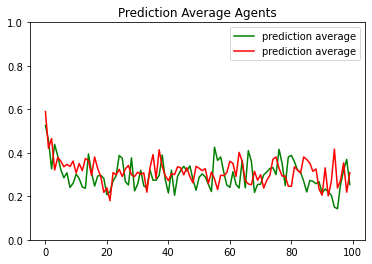

In [209]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Prediction Average Agents")
plt.show()

## Pairing an averaging agent with a not-so-chaotic counterpart
Instead of a dummy who has constant behavior, we can set a chaotic agent that has constant priors, but will still draw from the priors to generate variable behavior (within the bounds of those priors). The averaging agent should be able to approximate the priors, but not as easily as when the behavior was fixed.

In [6]:
c_a_world = World(agent=["average","chaos"], alphas=[0.5,0], betas=[0.5,0], seed=[17,115])
c_a_world.create_agents()
c_a_world.run()
agents = c_a_world.get_agents()
errors = c_a_world.get_errors()
preds = c_a_world.get_pred()
priors = c_a_world.get_priors()
time = [t for t in range(len(errors[0]))]
#c_a_world.print_results()

TypeError: __init__() got an unexpected keyword argument 'alphas'

In [ ]:

plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Averaging Agent + semi-dummy")
plt.show()

## Two Average Joes
We can have two averaging agents try to infer the other's priors.

In [7]:
a_a_world = World(agent=["average","average"], alphas=[0.5,0.5], betas=[0.2,0.2], seed=[17,150])
a_a_world.create_agents()
a_a_world.run()
agents = a_a_world.get_agents()
errors = a_a_world.get_errors()
preds = a_a_world.get_pred()
priors = a_a_world.get_priors()
time = [t for t in range(len(errors[0]))]
#c_a_world.print_results()

TypeError: __init__() got an unexpected keyword argument 'alphas'

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Averaging Agent x2")
plt.show()

In [8]:
a_a_world = World(agent=["average","average"], alphas=[0.1,0.1], betas=[0.2, 0.2], seed=[17,150])
a_a_world.create_agents()
a_a_world.run()
agents = a_a_world.get_agents()
errors = a_a_world.get_errors()
preds = a_a_world.get_pred()
priors = a_a_world.get_priors()
time = [t for t in range(len(errors[0]))]
#c_a_world.print_results()

TypeError: __init__() got an unexpected keyword argument 'alphas'

In [9]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Averaging Agent x2 - less chaos")
plt.show()

NameError: name 'time' is not defined

In [10]:
p_p_world = World(agent=["prediction","prediction"], alphas=[0.3,0.3], betas=[0.3, 0.3], seed=[1,12])
p_p_world.create_agents()
p_p_world.run()
agents = p_p_world.get_agents()
errors = p_p_world.get_errors()
preds = p_p_world.get_pred()
priors = p_p_world.get_priors()
time = [t for t in range(len(errors[0]))]

TypeError: __init__() got an unexpected keyword argument 'alphas'

In [ ]:
plt.plot(time, errors[0], 'g', label=agents[0])
plt.plot(time, errors[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Prediction Average x Prediction Average")
plt.show()